In [1]:
import json
import numpy as np
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
url = "https://raw.githubusercontent.com/PawanKrGunjan/Natural-Language-Processing/main/Sarcasm%20Detection/sarcasm.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)


In [3]:
sentence = df['headline']
vectorizer = TfidfVectorizer(stop_words='english')

vectorized_documents = vectorizer.fit_transform(sentence)


In [4]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())


In [5]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)


KMeans(max_iter=500, n_clusters=3, n_init=5, random_state=42)

In [6]:
results = pd.DataFrame()
results['document'] = sentence
results['cluster'] = kmeans.labels_

print(results.sample(5))


                                                document  cluster
15090  this rare gene mutation makes some people crav...        1
3435   motor trend car of year stripped of title afte...        1
11643            jew-sponsored stock car booed off track        1
20741  disturbing new ad reveals the future of the go...        0
8948   self-directed retirement accounts and turnkey ...        1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


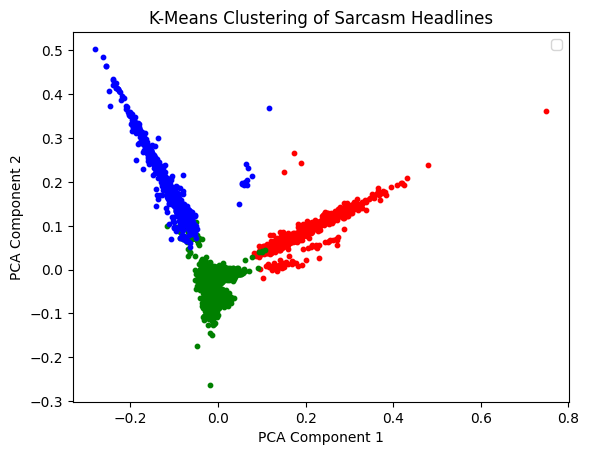

In [ ]:
colors = ['red', 'green', 'blue', 'yellow']
# cluster_labels = ['Not Sarcastic', 'Sarcastic']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
                reduced_data[kmeans.labels_ == i, 1], 
                s=10, color=colors[i], 
                )

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Sarcasm Headlines')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                                document  cluster
1463      city to issue deep, meaningful municipal bonds        0
332    obama begins inauguration festivities with cer...        0
452               desperate dole promises best prom ever        0
25313  ricky gervais stands up for truth in the age o...        0
4982             selena gomez hits the beach in a bikini        0


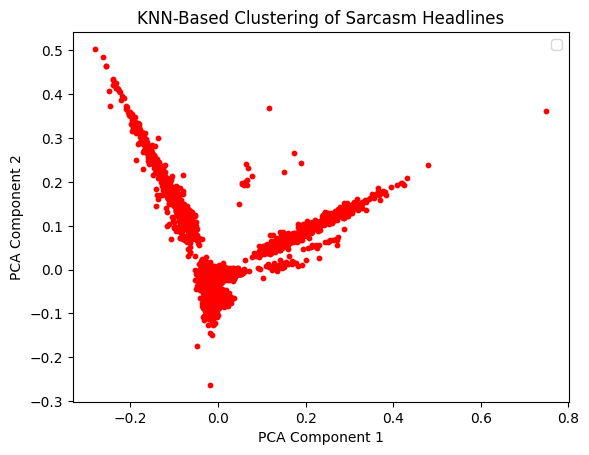

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Using KNN to find the nearest neighbors (without supervised classification)
knn = NearestNeighbors(n_neighbors=2)
knn.fit(vectorized_documents.toarray())

distances, indices = knn.kneighbors(vectorized_documents.toarray())

clusters = np.zeros(len(sentence))

for i in range(len(sentence)):
    # Cluster the document based on its nearest neighbor labels
    neighbor_labels = clusters[indices[i]]
    clusters[i] = np.bincount(neighbor_labels.astype(int)).argmax()

# Create results DataFrame for KNN Clustering Simulation
knn_results = pd.DataFrame()
knn_results['document'] = sentence
knn_results['cluster'] = clusters.astype(int)

print(knn_results.sample(5))

for i in range(num_clusters):
    plt.scatter(reduced_data[clusters == i, 0], 
                reduced_data[clusters == i, 1], 
                s=10, color=colors[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KNN-Based Clustering of Sarcasm Headlines')
plt.show()
